# Line Defect Simulations

Now we try to simulate different line defect using MEEP

I will begin with 2D lattice and then the 3D lattice case.

## 2D line defect in triangle lattice
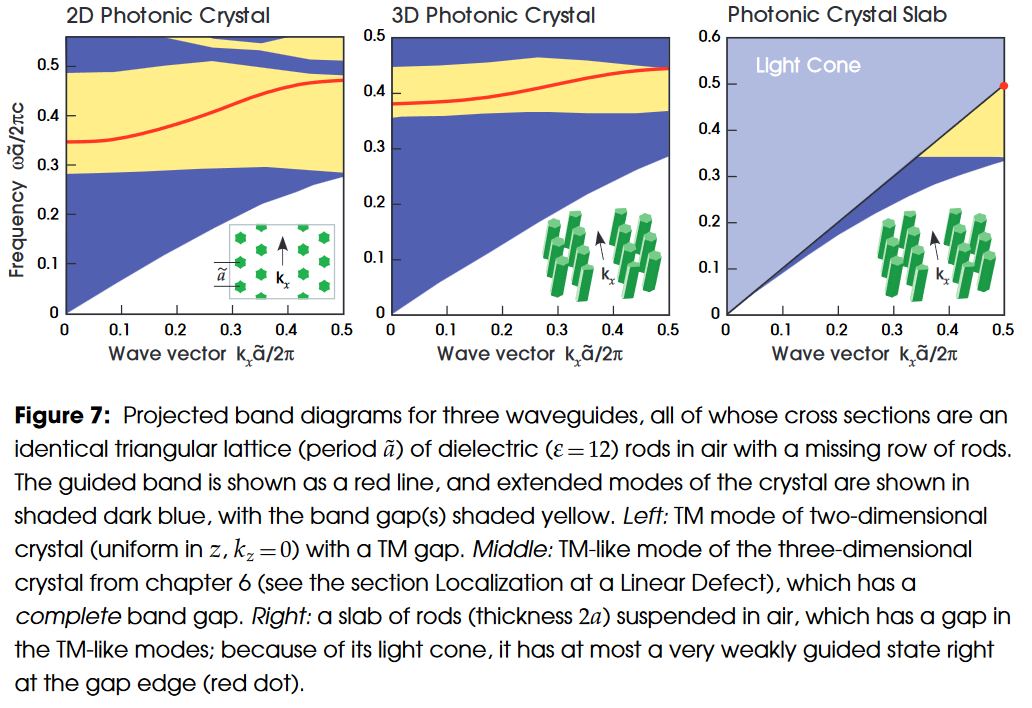
What I will trying to simulate is shown above,

In [26]:
from meep import mpb
import numpy as np
import meep as mp
import matplotlib.pyplot as plt
from mayavi import mlab

import math

import meep as mp
from meep import mpb

# A line_defect waveguide in a 2d triangular lattice of dielectric
# rods (c.f. tri_rods.ctl), formed by a row of missing rods along the
# "x" direction.  (Here, "x" and "y" refer to the first and second
# basis directions.)  This structure supports a single guided band
# within the band gap, much like the analogous waveguide in a square
# lattice of rods (see "Photonic Crystals" by Joannopoulos et al.).

supercell_y = 7  # the (odd) number of lateral supercell periods

geometry_lattice = mp.Lattice(
    size=mp.Vector3(1, supercell_y),
    basis1=mp.Vector3(math.sqrt(3) / 2, 0.5),
    basis2=mp.Vector3(math.sqrt(3) / 2, -0.5),
)

eps = 12  # the dielectric constant of the rods
r = 0.14  # the rod radius in the bulk crystal

geometry = [mp.Cylinder(r, material=mp.Medium(epsilon=eps))]

# duplicate the bulk crystal rods over the supercell:
geometry = mp.geometric_objects_lattice_duplicates(geometry_lattice, geometry)

# add a rod of air, to erase a row of rods and form a waveguide:
geometry += [mp.Cylinder(r, material=mp.air)]

Gamma = mp.Vector3()
K_prime = mp.lattice_to_reciprocal(
    mp.Vector3(0.5), geometry_lattice
)  # edge of Brillouin zone.
k_points = mp.interpolate(6, [Gamma, K_prime])

# the bigger the supercell, the more bands you need to compute to get
# to the defect modes (the lowest band is "folded" supercell_y times):
extra_bands = 25  # number of extra bands to compute above the gap
num_bands = supercell_y + extra_bands

resolution = 32

ms = mpb.ModeSolver(
    geometry_lattice=geometry_lattice,
    geometry=geometry,
    k_points=k_points,
    num_bands=num_bands,
    resolution=resolution,
)
ms.run_tm()
tm_freqs = ms.all_freqs

Initializing eigensolver data
Computing 32 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 32 x 224 x 1.
Solving for 11 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (0.866025, 0.5, 0)
     (6.06218, -3.5, 0)
     (0, 0, 1)
Cell volume = 6.06218
Reciprocal lattice vectors (/ 2 pi):
     (0.57735, 1, -0)
     (0.0824786, -0.142857, 0)
     (-0, 0, 1)
Geometric objects:
     cylinder, center = (0,3,0)
          radius 0.14, height 1e+20, axis (0, 0, 1)
     cylinder, center = (0,2,0)
          radius 0.14, height 1e+20, axis (0, 0, 1)
     cylinder, center = (0,1,0)
          radius 0.14, height 1e+20, axis (0, 0, 1)
     cylinder, center = (0,0,0)
          radius 0.14, height 1e+20, axis (0, 0, 1)
     cylinder, center = (0,-1,0)
          radius 0.14, height 1e+20, axis (0, 0, 1)
     cylinder, center = (0,-2,0)
          radius 0.14, height 1e+20, axis (0, 0, 1)
     cylinder, center = (0,-3,0)
          radius 0.14, height 1e+20, ax

    iteration   25: trace = 5.99461195754972 (0.000148234% change)
    linmin: converged after 2 iterations.
    iteration   26: trace = 5.994608930971793 (5.04883e-05% change)
    linmin: converged after 2 iterations.
    iteration   27: trace = 5.994607645983484 (2.14357e-05% change)
    linmin: converged after 2 iterations.
    iteration   28: trace = 5.994607102509251 (9.06605e-06% change)
Finished solving for bands 13 to 23 after 28 iterations.
Solving for bands 24 to 32...
    near maximum in trace
    linmin: converged after 7 iterations.
    iteration    1: trace = 29.95048425417713 (193.91% change)
    linmin: converged after 8 iterations.
    iteration    2: trace = 10.37423833417047 (97.093% change)
    linmin: converged after 5 iterations.
    iteration    3: trace = 8.593949733428019 (18.7713% change)
    linmin: converged after 5 iterations.
    iteration    4: trace = 8.041829406360195 (6.63775% change)
    linmin: converged after 4 iterations.
    iteration    5: trace 

    iteration    9: trace = 8.15883067946211 (2.29913e-05% change)
    linmin: converged after 2 iterations.
    iteration   10: trace = 8.158830234258101 (5.45671e-06% change)
Finished solving for bands 23 to 32 after 10 iterations.
Finished k-point with 12.4062 mean iterations/band.
tmfreqs:, 2, 0.0714286, 0.25, 0, 0.0714286, 0.0550799, 0.13266, 0.141691, 0.2377, 0.254841, 0.312013, 0.37225, 0.546685, 0.551469, 0.573977, 0.574096, 0.592841, 0.596083, 0.72057, 0.723515, 0.735323, 0.736867, 0.746873, 0.749305, 0.756146, 0.758549, 0.775965, 0.781474, 0.800964, 0.807116, 0.850494, 0.883229, 0.925626, 0.931369, 0.981862, 1.01485, 1.01662
elapsed time for k point: 1.9669947624206543
solve_kpoint (0.142857,0.5,0):
Solving for bands 1 to 11...
    linmin: converged after 4 iterations.
    iteration    1: trace = 1.729948390953895 (0.863577% change)
    linmin: converged after 4 iterations.
    iteration    2: trace = 1.727379269342604 (0.148619% change)
    linmin: converged after 4 iteratio

    linmin: converged after 4 iterations.
    iteration    6: trace = 5.544285332101117 (0.00370715% change)
    linmin: converged after 4 iterations.
    iteration    7: trace = 5.544127988824876 (0.00283798% change)
    linmin: converged after 3 iterations.
    iteration    8: trace = 5.543883348547904 (0.0044127% change)
    large trace change predicted (0.0136408%)
    linmin: converged after 4 iterations.
    iteration    9: trace = 5.54318146367042 (0.0126613% change)
    large trace change predicted (0.0283109%)
    linmin: converged after 4 iterations.
    iteration   10: trace = 5.541778526145047 (0.0253125% change)
    linmin: converged after 4 iterations.
    iteration   11: trace = 5.540408081363279 (0.0247324% change)
    linmin: converged after 4 iterations.
    iteration   12: trace = 5.539463123674317 (0.0170572% change)
    linmin: converged after 3 iterations.
    iteration   13: trace = 5.539083300409398 (0.00685692% change)
    linmin: converged after 3 iterations.


    linmin: converged after 5 iterations.
    iteration   17: trace = 5.485063286576182 (0.0121791% change)
    linmin: converged after 4 iterations.
    iteration   18: trace = 5.484331872891974 (0.0133355% change)
    linmin: converged after 4 iterations.
    iteration   19: trace = 5.483714521863231 (0.0112573% change)
    linmin: converged after 4 iterations.
    iteration   20: trace = 5.483192894369052 (0.00951275% change)
    linmin: converged after 4 iterations.
    iteration   21: trace = 5.482754450545242 (0.00799646% change)
    linmin: converged after 3 iterations.
    iteration   22: trace = 5.48237832885078 (0.00686032% change)
    linmin: converged after 3 iterations.
    iteration   23: trace = 5.482070020473362 (0.00562378% change)
    linmin: converged after 3 iterations.
    iteration   24: trace = 5.481826227120018 (0.0044472% change)
    linmin: converged after 3 iterations.
    iteration   25: trace = 5.481639798305455 (0.00340091% change)
    linmin: converged af

    iteration    5: trace = 5.421736759215436 (0.0143917% change)
    linmin: converged after 4 iterations.
    iteration    6: trace = 5.420962559648289 (0.0142806% change)
    linmin: converged after 4 iterations.
    iteration    7: trace = 5.420565307576137 (0.00732834% change)
    linmin: converged after 4 iterations.
    iteration    8: trace = 5.420398760208051 (0.00307256% change)
    linmin: converged after 2 iterations.
    iteration    9: trace = 5.420341413967632 (0.00105798% change)
    linmin: converged after 2 iterations.
    iteration   10: trace = 5.420328947720443 (0.00022999% change)
    linmin: converged after 2 iterations.
    iteration   11: trace = 5.420325326171303 (6.68142e-05% change)
    linmin: converged after 2 iterations.
    iteration   12: trace = 5.420321740421612 (6.61538e-05% change)
    large trace change predicted (0.000175656%)
    linmin: converged after 3 iterations.
    iteration   13: trace = 5.420312223514366 (0.000175578% change)
    large tr

    linmin: converged after 2 iterations.
    iteration   79: trace = 5.414420313570535 (1.15284e-05% change)
    linmin: converged after 2 iterations.
    iteration   80: trace = 5.414419510471268 (1.48326e-05% change)
    linmin: converged after 2 iterations.
    iteration   81: trace = 5.414418692002982 (1.51165e-05% change)
    linmin: converged after 2 iterations.
    iteration   82: trace = 5.414418040426023 (1.20341e-05% change)
    linmin: converged after 2 iterations.
    iteration   83: trace = 5.414417289230194 (1.3874e-05% change)
    linmin: converged after 2 iterations.
    iteration   84: trace = 5.414416678320408 (1.1283e-05% change)
    linmin: converged after 2 iterations.
    iteration   85: trace = 5.414416440754573 (4.38765e-06% change)
Finished solving for bands 12 to 22 after 85 iterations.
Solving for bands 23 to 32...
    linmin: converged after 5 iterations.
    iteration    1: trace = 7.72005555971562 (4.48909% change)
    linmin: converged after 5 iterations

    linmin: converged after 3 iterations.
    iteration   68: trace = 7.597869448100714 (0.000216715% change)
    linmin: converged after 3 iterations.
    iteration   69: trace = 7.597853601834329 (0.000208562% change)
    resetting CG direction...
    large trace change predicted (0.0204017%)
    linmin: converged after 3 iterations.
    iteration   70: trace = 7.596305618026546 (0.020376% change)
    linmin: converged after 4 iterations.
    iteration   71: trace = 7.595872430986295 (0.00570276% change)
    linmin: converged after 4 iterations.
    iteration   72: trace = 7.595690852609327 (0.00239052% change)
    linmin: converged after 2 iterations.
    iteration   73: trace = 7.595601325820629 (0.00117866% change)
    linmin: converged after 2 iterations.
    iteration   74: trace = 7.595554674504312 (0.00061419% change)
    linmin: converged after 2 iterations.
    iteration   75: trace = 7.595540356982056 (0.000188499% change)
    linmin: converged after 2 iterations.
    itera

    linmin: converged after 3 iterations.
    iteration    7: trace = 5.35248897192095 (0.070338% change)
    linmin: converged after 3 iterations.
    iteration    8: trace = 5.351365294152151 (0.0209958% change)
    linmin: converged after 3 iterations.
    iteration    9: trace = 5.351056332130895 (0.00577368% change)
    linmin: converged after 2 iterations.
    iteration   10: trace = 5.350921969701134 (0.00251098% change)
    linmin: converged after 4 iterations.
    iteration   11: trace = 5.350844495566854 (0.00144788% change)
    linmin: converged after 2 iterations.
    iteration   12: trace = 5.350807643708885 (0.000688713% change)
    linmin: converged after 2 iterations.
    iteration   13: trace = 5.35079438379096 (0.000247812% change)
    linmin: converged after 2 iterations.
    iteration   14: trace = 5.350789339632024 (9.42694e-05% change)
    linmin: converged after 2 iterations.
    iteration   15: trace = 5.350787483504607 (3.46889e-05% change)
    linmin: converge

epsilon: 1-12, mean 2.36812, harm. mean 1.14348, 14.8158% > 1, 12.4375% "fill"
real part range: 1 .. 12


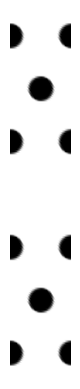

epsilon: 1-12, mean 2.36812, harm. mean 1.14348, 14.8158% > 1, 12.4375% "fill"
real part range: 1 .. 12


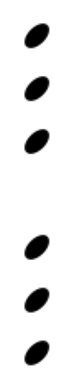

In [16]:
import matplotlib.pyplot as plt
md = mpb.MPBData(rectify=True, periods=1, resolution=64)
eps = ms.get_epsilon()
converted_eps = md.convert(eps)

plt.imshow(converted_eps.T, interpolation='spline36', cmap='binary')
plt.axis('off')
plt.show()

import matplotlib.pyplot as plt
md = mpb.MPBData(rectify=False, periods=1, resolution=64)
eps = ms.get_epsilon()
converted_eps = md.convert(eps)

plt.imshow(converted_eps.T, interpolation='spline36', cmap='binary')
plt.axis('off')
plt.show()

Text(0, 0.5, '$\\omega a/(2\\pi c)$')

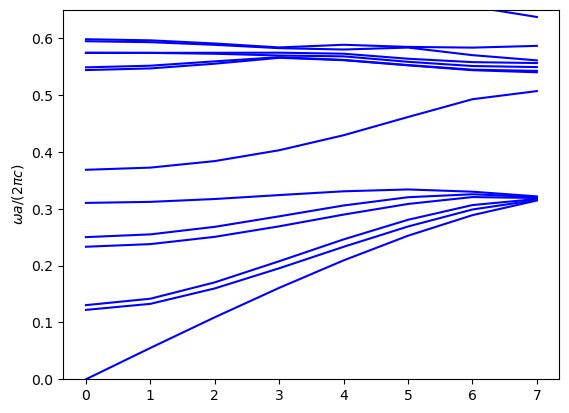

In [30]:
import matplotlib.pyplot as plt
numk,tmp=np.shape(tm_freqs)
klist=range(numk)

fig,ax=plt.subplots()
x = range(len(tm_freqs))
for l in range(num_bands):
    plt.plot(tm_freqs[:,l],'b-')
plt.ylim([0,0.65])
plt.ylabel('$\omega a/(2\pi c)$')

We can see that the results are neally the same with results from textbook.

## 3D line defect
Now I will try to simulate the 3D line defect

In [4]:
from meep import mpb
import numpy as np
import meep as mp
import matplotlib.pyplot as plt
from mayavi import mlab

import math

import meep as mp
from meep import mpb

# A line_defect waveguide in a 3d triangular lattice of dielectric
# rods (c.f. tri_rods.ctl), formed by a row of missing rods along the
# "x" direction.  (Here, "x" and "y" refer to the first and second
# basis directions.)  This structure supports a single guided band
# within the band gap, much like the analogous waveguide in a square
# lattice of rods (see "Photonic Crystals" by Joannopoulos et al.).

supercell_y = 7  # the (odd) number of lateral supercell periods

geometry_lattice = mp.Lattice(
    size=mp.Vector3(1, supercell_y,6),
    basis1=mp.Vector3(math.sqrt(3) / 2, 0.5),
    basis2=mp.Vector3(math.sqrt(3) / 2, -0.5),
)

eps = 12  # the dielectric constant of the rods
r = 0.14  # the rod radius in the bulk crystal
h=2

geometry = [mp.Cylinder(center=mp.Vector3(),radius=r, height=h,material=mp.Medium(epsilon=eps))]


# duplicate the bulk crystal rods over the supercell:
geometry = mp.geometric_objects_lattice_duplicates(geometry_lattice, geometry)

# add a rod of air, to erase a row of rods and form a waveguide:
geometry += [mp.Cylinder(center=mp.Vector3(),radius=r, height=h,material=mp.air)]

Gamma = mp.Vector3()
K_prime = mp.lattice_to_reciprocal(
    mp.Vector3(0.5), geometry_lattice
)  # edge of Brillouin zone.
k_points = mp.interpolate(6, [Gamma, K_prime])

# the bigger the supercell, the more bands you need to compute to get
# to the defect modes (the lowest band is "folded" supercell_y times):
extra_bands = 20  # number of extra bands to compute above the gap
num_bands = supercell_y + extra_bands

resolution = 10

ms = mpb.ModeSolver(
    geometry_lattice=geometry_lattice,
    geometry=geometry,
    k_points=k_points,
    num_bands=num_bands,
    resolution=resolution,
)
ms.run_tm()
tm_freqs = ms.all_freqs

Initializing eigensolver data
Computing 27 bands with 1e-07 tolerance
Working in 3 dimensions.
Grid size is 10 x 70 x 50.
Solving for 9 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (0.866025, 0.5, 0)
     (6.06218, -3.5, 0)
     (0, 0, 5)
Cell volume = 30.3109
Reciprocal lattice vectors (/ 2 pi):
     (0.57735, 1, -0)
     (0.0824786, -0.142857, 0)
     (-0, 0, 0.2)
Geometric objects:
     cylinder, center = (0,3,2)
          radius 0.14, height 2, axis (0, 0, 1)
     cylinder, center = (0,2,2)
          radius 0.14, height 2, axis (0, 0, 1)
     cylinder, center = (0,1,2)
          radius 0.14, height 2, axis (0, 0, 1)
     cylinder, center = (0,0,2)
          radius 0.14, height 2, axis (0, 0, 1)
     cylinder, center = (0,-1,2)
          radius 0.14, height 2, axis (0, 0, 1)
     cylinder, center = (0,-2,2)
          radius 0.14, height 2, axis (0, 0, 1)
     cylinder, center = (0,-3,2)
          radius 0.14, height 2, axis (0, 0, 1)
     cylinder,

    linmin: converged after 3 iterations.
    iteration   34: trace = 0.3747678383208149 (0.000843999% change)
    linmin: converged after 3 iterations.
    iteration   35: trace = 0.3747644508177547 (0.000903898% change)
    linmin: converged after 3 iterations.
    iteration   36: trace = 0.3747611199120925 (0.000888804% change)
    linmin: converged after 3 iterations.
    iteration   37: trace = 0.3747561969107516 (0.00131365% change)
    linmin: converged after 3 iterations.
    iteration   38: trace = 0.3747499981631794 (0.00165409% change)
    linmin: converged after 3 iterations.
    iteration   39: trace = 0.3747406795175223 (0.00248666% change)
    linmin: converged after 3 iterations.
    iteration   40: trace = 0.3747305611393286 (0.00270014% change)
    linmin: converged after 3 iterations.
    iteration   41: trace = 0.3747203992009333 (0.00271184% change)
    linmin: converged after 3 iterations.
    iteration   42: trace = 0.37471092749197 (0.00252771% change)
    linmi

    iteration   50: trace = 0.9784014459472949 (8.50579e-05% change)
    linmin: converged after 2 iterations.
    iteration   51: trace = 0.978400791244863 (6.69155e-05% change)
    linmin: converged after 2 iterations.
    iteration   52: trace = 0.978400315244198 (4.86509e-05% change)
    linmin: converged after 2 iterations.
    iteration   53: trace = 0.9784000236129824 (2.98069e-05% change)
    linmin: converged after 2 iterations.
    iteration   54: trace = 0.9783998318506012 (1.95996e-05% change)
    linmin: converged after 2 iterations.
    iteration   55: trace = 0.9783997225583912 (1.11705e-05% change)
    linmin: converged after 2 iterations.
    iteration   56: trace = 0.9783996552323435 (6.88124e-06% change)
Finished solving for bands 11 to 19 after 56 iterations.
Solving for bands 20 to 27...
    near maximum in trace
    linmin: converged after 7 iterations.
    iteration    1: trace = 8.796118138051735 (185.149% change)
    linmin: converged after 10 iterations.
    i

    iteration   38: trace = 0.3418557954576659 (0.000388439% change)
    linmin: converged after 2 iterations.
    iteration   39: trace = 0.3418548194433123 (0.000285505% change)
    linmin: converged after 2 iterations.
    iteration   40: trace = 0.3418541738584037 (0.000188848% change)
    linmin: converged after 2 iterations.
    iteration   41: trace = 0.341853720731363 (0.00013255% change)
    linmin: converged after 2 iterations.
    iteration   42: trace = 0.3418533486575698 (0.00010884% change)
    linmin: converged after 2 iterations.
    iteration   43: trace = 0.3418530128926855 (9.8219e-05% change)
    linmin: converged after 2 iterations.
    iteration   44: trace = 0.3418527427386776 (7.90264e-05% change)
    linmin: converged after 2 iterations.
    iteration   45: trace = 0.3418525279526672 (6.283e-05% change)
    linmin: converged after 2 iterations.
    iteration   46: trace = 0.3418523827171194 (4.24849e-05% change)
    linmin: converged after 2 iterations.
    ite

    iteration   16: trace = 1.001100804567538 (0.000252148% change)
    linmin: converged after 2 iterations.
    iteration   17: trace = 1.001099199306645 (0.00016035% change)
    linmin: converged after 2 iterations.
    iteration   18: trace = 1.001098459404601 (7.3909e-05% change)
    linmin: converged after 2 iterations.
    iteration   19: trace = 1.001097891718195 (5.67064e-05% change)
    linmin: converged after 2 iterations.
    iteration   20: trace = 1.001097432724133 (4.58491e-05% change)
    linmin: converged after 2 iterations.
    iteration   21: trace = 1.001097071956738 (3.60372e-05% change)
    linmin: converged after 2 iterations.
    iteration   22: trace = 1.001096901315067 (1.70455e-05% change)
    linmin: converged after 2 iterations.
    iteration   23: trace = 1.001096827772284 (7.34622e-06% change)
Finished solving for bands 10 to 18 after 23 iterations.
Solving for bands 19 to 27...
    linmin: converged after 4 iterations.
    iteration    1: trace = 1.56517

Finished solving for bands 10 to 18 after 41 iterations.
Solving for bands 19 to 27...
    linmin: converged after 4 iterations.
    iteration    1: trace = 1.707952077809268 (0.80129% change)
    linmin: converged after 4 iterations.
    iteration    2: trace = 1.705412917037901 (0.148778% change)
    linmin: converged after 2 iterations.
    iteration    3: trace = 1.705037488493127 (0.0220164% change)
    linmin: converged after 4 iterations.
    iteration    4: trace = 1.704874572656432 (0.00955543% change)
    linmin: converged after 2 iterations.
    iteration    5: trace = 1.704840567619873 (0.0019946% change)
    linmin: converged after 2 iterations.
    iteration    6: trace = 1.704817959924677 (0.0013261% change)
    linmin: converged after 2 iterations.
    iteration    7: trace = 1.704810250943131 (0.000452189% change)
    linmin: converged after 2 iterations.
    iteration    8: trace = 1.70480625440018 (0.000234428% change)
    linmin: converged after 2 iterations.
    it

    linmin: converged after 3 iterations.
    iteration   45: trace = 1.254993142924009 (0.00259077% change)
    linmin: converged after 3 iterations.
    iteration   46: trace = 1.254966169534518 (0.00214931% change)
    linmin: converged after 3 iterations.
    iteration   47: trace = 1.254944618828849 (0.00171725% change)
    linmin: converged after 3 iterations.
    iteration   48: trace = 1.254928542796776 (0.00128102% change)
    linmin: converged after 3 iterations.
    iteration   49: trace = 1.254915630015045 (0.00102897% change)
    linmin: converged after 3 iterations.
    iteration   50: trace = 1.254905915764047 (0.000774099% change)
    linmin: converged after 3 iterations.
    iteration   51: trace = 1.25489917831496 (0.00053689% change)
    linmin: converged after 3 iterations.
    iteration   52: trace = 1.254893604150235 (0.000444193% change)
    linmin: converged after 3 iterations.
    iteration   53: trace = 1.254889054121922 (0.000362583% change)
    linmin: conve

    iteration   34: trace = 0.8442495184462306 (0.496105% change)
    linmin: converged after 6 iterations.
    iteration   35: trace = 0.8410752237705356 (0.376698% change)
    linmin: converged after 6 iterations.
    iteration   36: trace = 0.8398645930809068 (0.144042% change)
    linmin: converged after 6 iterations.
    iteration   37: trace = 0.8389045276236735 (0.114377% change)
    linmin: converged after 5 iterations.
    iteration   38: trace = 0.8383512280304262 (0.0659768% change)
    linmin: converged after 5 iterations.
    iteration   39: trace = 0.837839313668958 (0.0610807% change)
    linmin: converged after 4 iterations.
    iteration   40: trace = 0.8375686771421654 (0.0323069% change)
    linmin: converged after 3 iterations.
    iteration   41: trace = 0.8374385339276106 (0.0155394% change)
    linmin: converged after 3 iterations.
    iteration   42: trace = 0.8373469965693993 (0.0109312% change)
    linmin: converged after 3 iterations.
    iteration   43: trac

    linmin: converged after 3 iterations.
    iteration   30: trace = 2.143146537152633 (0.00648533% change)
    linmin: converged after 3 iterations.
    iteration   31: trace = 2.14299637559825 (0.00700684% change)
    linmin: converged after 3 iterations.
    iteration   32: trace = 2.142854661266533 (0.00661312% change)
    linmin: converged after 3 iterations.
    iteration   33: trace = 2.142735232163399 (0.00557352% change)
    linmin: converged after 3 iterations.
    iteration   34: trace = 2.142628509575969 (0.00498079% change)
    linmin: converged after 3 iterations.
    iteration   35: trace = 2.142519618095974 (0.00508227% change)
    linmin: converged after 3 iterations.
    iteration   36: trace = 2.142407201877933 (0.00524705% change)
    linmin: converged after 3 iterations.
    iteration   37: trace = 2.14230904449717 (0.00458174% change)
    linmin: converged after 3 iterations.
    iteration   38: trace = 2.142240403955301 (0.0032041% change)
    linmin: converged 

    linmin: converged after 2 iterations.
    iteration    3: trace = 1.635685466589622 (0.0613715% change)
    linmin: converged after 4 iterations.
    iteration    4: trace = 1.63522978601898 (0.0278626% change)
    linmin: converged after 2 iterations.
    iteration    5: trace = 1.635136346734815 (0.0057143% change)
    linmin: converged after 4 iterations.
    iteration    6: trace = 1.635084998392126 (0.00314036% change)
    linmin: converged after 2 iterations.
    iteration    7: trace = 1.635062134557514 (0.00139834% change)
    linmin: converged after 2 iterations.
    iteration    8: trace = 1.63504595500104 (0.000989543% change)
    linmin: converged after 2 iterations.
    iteration    9: trace = 1.63503421396169 (0.000718089% change)
    linmin: converged after 2 iterations.
    iteration   10: trace = 1.635020790466581 (0.000820995% change)
    linmin: converged after 3 iterations.
    iteration   11: trace = 1.635002553042923 (0.00111543% change)
    linmin: converged 

    iteration   77: trace = 1.63394005711226 (2.90593e-05% change)
    linmin: converged after 2 iterations.
    iteration   78: trace = 1.633939527761293 (3.23972e-05% change)
    linmin: converged after 2 iterations.
    iteration   79: trace = 1.633938785526708 (4.54261e-05% change)
    linmin: converged after 3 iterations.
    iteration   80: trace = 1.633937839048987 (5.79262e-05% change)
    linmin: converged after 3 iterations.
    iteration   81: trace = 1.633936870773847 (5.92602e-05% change)
    linmin: converged after 3 iterations.
    iteration   82: trace = 1.633935765817592 (6.76254e-05% change)
    linmin: converged after 3 iterations.
    iteration   83: trace = 1.63393476723945 (6.11149e-05% change)
    linmin: converged after 3 iterations.
    iteration   84: trace = 1.63393338212655 (8.47717e-05% change)
    linmin: converged after 3 iterations.
    iteration   85: trace = 1.633931759288497 (9.9321e-05% change)
    linmin: converged after 3 iterations.
    iteration 

    linmin: converged after 3 iterations.
    iteration   59: trace = 2.350298184539717 (0.000148317% change)
    linmin: converged after 3 iterations.
    iteration   60: trace = 2.350294873768423 (0.000140866% change)
    linmin: converged after 3 iterations.
    iteration   61: trace = 2.35029215781311 (0.000115558% change)
    linmin: converged after 3 iterations.
    iteration   62: trace = 2.35028994021902 (9.4354e-05% change)
    linmin: converged after 3 iterations.
    iteration   63: trace = 2.350287882774941 (8.754e-05% change)
    linmin: converged after 3 iterations.
    iteration   64: trace = 2.350285818959513 (8.78112e-05% change)
    linmin: converged after 3 iterations.
    iteration   65: trace = 2.35028378679046 (8.64648e-05% change)
    linmin: converged after 3 iterations.
    iteration   66: trace = 2.350281694123202 (8.9039e-05% change)
    linmin: converged after 3 iterations.
    iteration   67: trace = 2.350279364929009 (9.91028e-05% change)
    linmin: conve

    linmin: converged after 3 iterations.
    iteration  133: trace = 2.350087691370909 (8.52571e-05% change)
    linmin: converged after 3 iterations.
    iteration  134: trace = 2.35008568875992 (8.52143e-05% change)
    linmin: converged after 3 iterations.
    iteration  135: trace = 2.35008369043064 (8.50322e-05% change)
    linmin: converged after 3 iterations.
    iteration  136: trace = 2.350081700277086 (8.46844e-05% change)
    linmin: converged after 3 iterations.
    iteration  137: trace = 2.350079722649785 (8.41515e-05% change)
    linmin: converged after 3 iterations.
    iteration  138: trace = 2.350077762116984 (8.34241e-05% change)
    linmin: converged after 3 iterations.
    iteration  139: trace = 2.350075823194801 (8.25046e-05% change)
    resetting CG direction...
    large trace change predicted (0.00704404%)
    linmin: converged after 2 iterations.
    iteration  140: trace = 2.34991023153594 (0.00704647% change)
    linmin: converged after 3 iterations.
    i

    iteration    6: trace = 1.006247785674206 (0.0193383% change)
    linmin: converged after 4 iterations.
    iteration    7: trace = 1.006134445968093 (0.0112642% change)
    linmin: converged after 2 iterations.
    iteration    8: trace = 1.006100487606769 (0.00337519% change)
    linmin: converged after 2 iterations.
    iteration    9: trace = 1.006079845293437 (0.00205174% change)
    linmin: converged after 4 iterations.
    iteration   10: trace = 1.006051516086786 (0.00281584% change)
    linmin: converged after 4 iterations.
    iteration   11: trace = 1.006030588186577 (0.00208022% change)
    linmin: converged after 4 iterations.
    iteration   12: trace = 1.005999643435493 (0.00307597% change)
    linmin: converged after 4 iterations.
    iteration   13: trace = 1.005961516114047 (0.00379007% change)
    linmin: converged after 4 iterations.
    iteration   14: trace = 1.005896499345654 (0.00646336% change)
    linmin: converged after 4 iterations.
    iteration   15: t

    linmin: converged after 2 iterations.
    iteration   80: trace = 1.004617907427099 (0.000611998% change)
    linmin: converged after 2 iterations.
    iteration   81: trace = 1.004613574733434 (0.000431279% change)
    linmin: converged after 3 iterations.
    iteration   82: trace = 1.004606043158897 (0.000749701% change)
    large trace change predicted (0.00272282%)
    linmin: converged after 3 iterations.
    iteration   83: trace = 1.004578592248257 (0.00273254% change)
    large trace change predicted (0.0117011%)
    linmin: converged after 4 iterations.
    iteration   84: trace = 1.00447535086726 (0.0102776% change)
    linmin: converged after 4 iterations.
    iteration   85: trace = 1.00436010535012 (0.0114739% change)
    linmin: converged after 3 iterations.
    iteration   86: trace = 1.00426990271464 (0.00898151% change)
    linmin: converged after 4 iterations.
    iteration   87: trace = 1.004185464068795 (0.00840832% change)
    linmin: converged after 4 iterati

    iteration   14: trace = 1.797612341228544 (0.382197% change)
    linmin: converged after 5 iterations.
    iteration   15: trace = 1.790441318017779 (0.399717% change)
    linmin: converged after 4 iterations.
    iteration   16: trace = 1.786217238542795 (0.236203% change)
    linmin: converged after 3 iterations.
    iteration   17: trace = 1.78429353750251 (0.107755% change)
    linmin: converged after 3 iterations.
    iteration   18: trace = 1.783428194574769 (0.0485096% change)
    linmin: converged after 3 iterations.
    iteration   19: trace = 1.782719628142811 (0.0397385% change)
    linmin: converged after 3 iterations.
    iteration   20: trace = 1.782217224861054 (0.0281858% change)
    linmin: converged after 3 iterations.
    iteration   21: trace = 1.781783576817693 (0.0243349% change)
    linmin: converged after 3 iterations.
    iteration   22: trace = 1.78115571992899 (0.0352438% change)
    linmin: converged after 3 iterations.
    iteration   23: trace = 1.7801

    iteration   17: trace = 2.365630700441608 (0.10622% change)
    linmin: converged after 3 iterations.
    iteration   18: trace = 2.363939411978439 (0.0715198% change)
    linmin: converged after 3 iterations.
    iteration   19: trace = 2.363062147188141 (0.0371172% change)
    linmin: converged after 3 iterations.
    iteration   20: trace = 2.362488776830071 (0.0242668% change)
    linmin: converged after 3 iterations.
    iteration   21: trace = 2.362140224082791 (0.0147547% change)
    linmin: converged after 3 iterations.
    iteration   22: trace = 2.361889064320308 (0.0106333% change)
    linmin: converged after 3 iterations.
    iteration   23: trace = 2.361706439193402 (0.00773246% change)
    linmin: converged after 3 iterations.
    iteration   24: trace = 2.361582990802799 (0.00522722% change)
    linmin: converged after 4 iterations.
    iteration   25: trace = 2.36145409708669 (0.00545809% change)
    linmin: converged after 4 iterations.
    iteration   26: trace = 

In [ ]:
import matplotlib.pyplot as plt
numk,tmp=np.shape(tm_freqs)
klist=np.linspace(0,0.5,numk)
fig,ax=plt.subplots()
x = range(len(tm_freqs))
ratio=len(tm_freqs)
for l in range(num_bands):
    plt.plot(klist,tm_freqs[:,l],'b-')
plt.plot(klist,klist,'r-')
plt.ylim([0,0.65])
plt.ylabel('$\omega a/(2\pi c)$')

可以看到，与最右边的图是一样的

## 3D hole defect

Now we change the rods into holes

In [ ]:
from meep import mpb
import numpy as np
import meep as mp
import matplotlib.pyplot as plt
from mayavi import mlab

import math

import meep as mp
from meep import mpb

# A line_defect waveguide in a 3d triangular lattice of dielectric
# rods (c.f. tri_rods.ctl), formed by a row of missing rods along the
# "x" direction.  (Here, "x" and "y" refer to the first and second
# basis directions.)  This structure supports a single guided band
# within the band gap, much like the analogous waveguide in a square
# lattice of rods (see "Photonic Crystals" by Joannopoulos et al.).

supercell_y = 7  # the (odd) number of lateral supercell periods

geometry_lattice = mp.Lattice(
    size=mp.Vector3(1, supercell_y,6),
    basis1=mp.Vector3(math.sqrt(3) / 2, 0.5),
    basis2=mp.Vector3(math.sqrt(3) / 2, -0.5),
)
a=1
r = 0.35  # the rod radius in the bulk crystal
h=0.3

Si = mp.Medium(index=2.1376)

geometry = [ mp.Block(material=Si,size=(a,a,h),
                      center=mp.Vector3(),
                      e1=mp.cartesian_to_lattice(mp.Vector3(1,0,0),geometry_lattice),
                      e2=mp.cartesian_to_lattice(mp.Vector3(0,1,0),geometry_lattice),
                      e3=mp.cartesian_to_lattice(mp.Vector3(0,0,1),geometry_lattice),),
             mp.Cylinder(center=mp.Vector3(),radius=r, height=h, material=mp.air)]

# duplicate the bulk crystal rods over the supercell:
geometry = mp.geometric_objects_lattice_duplicates(geometry_lattice, geometry)

# add a rod of Si, to erase a row of rods and form a waveguide:
geometry += [mp.Cylinder(center=mp.Vector3(),radius=r, height=h, material=Si)]


num_k = 10
k_points = mp.interpolate(num_k, [mp.Vector3(0.4,0,),mp.Vector3(0.5,0)])

# the bigger the supercell, the more bands you need to compute to get
# to the defect modes (the lowest band is "folded" supercell_y times):
extra_bands = 30  # number of extra bands to compute above the gap
num_bands = supercell_y + extra_bands

resolution = 20

ms = mpb.ModeSolver(
    geometry_lattice=geometry_lattice,
    geometry=geometry,
    k_points=k_points,
    num_bands=num_bands,
    resolution=resolution,
)
ms.run_te()
te_freqs = ms.all_freqs

Initializing eigensolver data
Computing 37 bands with 1e-07 tolerance
Working in 3 dimensions.
Grid size is 20 x 140 x 120.
Solving for 10 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (0.866025, 0.5, 0)
     (6.06218, -3.5, 0)
     (0, 0, 6)
Cell volume = 36.3731
Reciprocal lattice vectors (/ 2 pi):
     (0.57735, 1, -0)
     (0.0824786, -0.142857, 0)
     (-0, 0, 0.166667)
Geometric objects:
     block, center = (0,3,3)
          size (1,1,0.3)
          axes (0.57735,0.57735,0), (1,-1,0), (0,0,1)
     block, center = (0,2,3)
          size (1,1,0.3)
          axes (0.57735,0.57735,0), (1,-1,0), (0,0,1)
     block, center = (0,1,3)
          size (1,1,0.3)
          axes (0.57735,0.57735,0), (1,-1,0), (0,0,1)
     block, center = (0,0,3)
          size (1,1,0.3)
          axes (0.57735,0.57735,0), (1,-1,0), (0,0,1)
     block, center = (0,-1,3)
          size (1,1,0.3)
          axes (0.57735,0.57735,0), (1,-1,0), (0,0,1)
     block, center = (0,-2,3

     cylinder, center = (0,-1,-2)
          radius 0.35, height 0.3, axis (0, 0, 1)
     cylinder, center = (0,-2,-2)
          radius 0.35, height 0.3, axis (0, 0, 1)
     cylinder, center = (0,-3,-2)
          radius 0.35, height 0.3, axis (0, 0, 1)
     cylinder, center = (0,0,0)
          radius 0.35, height 0.3, axis (0, 0, 1)
Geometric object tree has depth 9 and 1264 object nodes (vs. 85 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: zeven.
Initializing fields to random numbers...
12 k-points
  Vector3<0.4, 0.0, 0.0>
  Vector3<0.4090909090909091, 0.0, 0.0>
  Vector3<0.4181818181818182, 0.0, 0.0>
  Vector3<0.4272727272727273, 0.0, 0.0>
  Vector3<0.4363636363636364, 0.0, 0.0>
  Vector3<0.44545454545454544, 0.0, 0.0>
  Vector3<0.4545454545454546, 0.0, 0.0>
  Vector3<0.4636363636363636, 0.0, 0.0>
  Vector3<0.4727272727272727, 0.0, 0.0>
  Vector3<0.4818181818181818, 0.0, 0.0>
  Vector3<0.4909090909090909, 0.0, 0.0>
  Vector3<0.5, 

    linmin: converged after 2 iterations.
    iteration   33: trace = 1.832988020445043 (0.000243516% change)
    linmin: converged after 4 iterations.
    iteration   34: trace = 1.83298217135315 (0.000319102% change)
    linmin: converged after 4 iterations.
    iteration   35: trace = 1.832973742763415 (0.00045983% change)
    linmin: converged after 4 iterations.
    iteration   36: trace = 1.832962951470447 (0.000588733% change)
    linmin: converged after 4 iterations.
    iteration   37: trace = 1.832950980119718 (0.000653117% change)
    linmin: converged after 4 iterations.
    iteration   38: trace = 1.832939631595735 (0.000619141% change)
    linmin: converged after 4 iterations.
    iteration   39: trace = 1.83292942574742 (0.000556804% change)
    linmin: converged after 4 iterations.
    iteration   40: trace = 1.832921608333692 (0.000426499% change)
    linmin: converged after 4 iterations.
    iteration   41: trace = 1.832916154758767 (0.000297535% change)
    linmin: c

    linmin: converged after 3 iterations.
    iteration   10: trace = 1.724193280862528 (0.269458% change)
    linmin: converged after 3 iterations.
    iteration   11: trace = 1.720742949982235 (0.200313% change)
    linmin: converged after 4 iterations.
    iteration   12: trace = 1.7179949809483 (0.159824% change)
    linmin: converged after 4 iterations.
    iteration   13: trace = 1.715344234032519 (0.154412% change)
    linmin: converged after 4 iterations.
    iteration   14: trace = 1.713025726249321 (0.135254% change)
    linmin: converged after 3 iterations.
    iteration   15: trace = 1.711234941835324 (0.104594% change)
    linmin: converged after 3 iterations.
    iteration   16: trace = 1.709954483931722 (0.0748545% change)
    linmin: converged after 3 iterations.
    iteration   17: trace = 1.709058037637187 (0.0524389% change)
    linmin: converged after 4 iterations.
    iteration   18: trace = 1.708353241265019 (0.0412474% change)
    linmin: converged after 4 iterat

    iteration    6: trace = 2.11166252521457 (0.00112996% change)
    linmin: converged after 2 iterations.
    iteration    7: trace = 2.111650221926171 (0.000582637% change)
    linmin: converged after 2 iterations.
    iteration    8: trace = 2.111643595284281 (0.000313814% change)
    linmin: converged after 2 iterations.
    iteration    9: trace = 2.111639213737627 (0.000207495% change)
    linmin: converged after 2 iterations.
    iteration   10: trace = 2.111637482685688 (8.19767e-05% change)
    linmin: converged after 2 iterations.
    iteration   11: trace = 2.111636480933216 (4.74396e-05% change)
    linmin: converged after 2 iterations.
    iteration   12: trace = 2.111635905235029 (2.72631e-05% change)
    linmin: converged after 2 iterations.
    iteration   13: trace = 2.111635618275574 (1.35894e-05% change)
    linmin: converged after 2 iterations.
    iteration   14: trace = 2.111635428453537 (8.98934e-06% change)
Finished solving for bands 21 to 30 after 14 iteration

    iteration   25: trace = 1.876646779328459 (0.00109066% change)
    linmin: converged after 3 iterations.
    iteration   26: trace = 1.876617670084654 (0.00155114% change)
    linmin: converged after 3 iterations.
    iteration   27: trace = 1.876568110551637 (0.00264093% change)
    linmin: converged after 3 iterations.
    iteration   28: trace = 1.876512301172414 (0.00297406% change)
    linmin: converged after 3 iterations.
    iteration   29: trace = 1.876449064509157 (0.00336996% change)
    linmin: converged after 4 iterations.
    iteration   30: trace = 1.876372935831438 (0.00405714% change)
    linmin: converged after 3 iterations.
    iteration   31: trace = 1.87630638112964 (0.00354705% change)
    linmin: converged after 3 iterations.
    iteration   32: trace = 1.876239369217122 (0.00357154% change)
    linmin: converged after 3 iterations.
    iteration   33: trace = 1.876163916932208 (0.00402154% change)
    linmin: converged after 3 iterations.
    iteration   34: 

    iteration   24: trace = 2.133737105705228 (2.67996e-05% change)
    linmin: converged after 2 iterations.
    iteration   25: trace = 2.133736654044252 (2.11676e-05% change)
    linmin: converged after 2 iterations.
    iteration   26: trace = 2.133736246276858 (1.91105e-05% change)
    linmin: converged after 2 iterations.
    iteration   27: trace = 2.133735938304256 (1.44335e-05% change)
    linmin: converged after 2 iterations.
    iteration   28: trace = 2.133735728331533 (9.84061e-06% change)
Finished solving for bands 21 to 30 after 28 iterations.
Solving for bands 31 to 37...
    linmin: converged after 4 iterations.
    iteration    1: trace = 1.716549508260114 (0.0576601% change)
    linmin: converged after 2 iterations.
    iteration    2: trace = 1.716222518005798 (0.0190511% change)
    linmin: converged after 3 iterations.
    iteration    3: trace = 1.716025871945922 (0.0114587% change)
    large trace change predicted (0.0236962%)
    linmin: converged after 3 itera

    linmin: converged after 4 iterations.
    iteration    8: trace = 1.881179214324755 (0.0094827% change)
    linmin: converged after 4 iterations.
    iteration    9: trace = 1.881032115675257 (0.0078198% change)
    linmin: converged after 4 iterations.
    iteration   10: trace = 1.880949749901166 (0.00437885% change)
    linmin: converged after 4 iterations.
    iteration   11: trace = 1.880884562052206 (0.00346575% change)
    linmin: converged after 4 iterations.
    iteration   12: trace = 1.880840724513217 (0.00233071% change)
    linmin: converged after 4 iterations.
    iteration   13: trace = 1.880809550401332 (0.00165747% change)
    linmin: converged after 4 iterations.
    iteration   14: trace = 1.880791890987208 (0.000938931% change)
    linmin: converged after 2 iterations.
    iteration   15: trace = 1.880780176408384 (0.000622855% change)
    linmin: converged after 2 iterations.
    iteration   16: trace = 1.880774709005678 (0.000290699% change)
    linmin: conver

    iteration   32: trace = 1.716018797906724 (7.65203e-06% change)
Finished solving for bands 31 to 37 after 32 iterations.
Finished k-point with 28.7568 mean iterations/band.
zevenfreqs:, 4, 0.427273, 0, 0, 0.493372, 0.340262, 0.346104, 0.359989, 0.368037, 0.382881, 0.383868, 0.397661, 0.400508, 0.412408, 0.412636, 0.413347, 0.419376, 0.426094, 0.429874, 0.434393, 0.439103, 0.439486, 0.441419, 0.444157, 0.448226, 0.451985, 0.454035, 0.460036, 0.460772, 0.466902, 0.467332, 0.467416, 0.471491, 0.473502, 0.474539, 0.476494, 0.487112, 0.489307, 0.489789, 0.500248, 0.505594, 0.516243
elapsed time for k point: 149.41733026504517
solve_kpoint (0.436364,0,0):
Solving for bands 1 to 10...
    linmin: converged after 3 iterations.
    iteration    1: trace = 1.495764371901526 (0.0468579% change)
    linmin: converged after 3 iterations.
    iteration    2: trace = 1.495614690162756 (0.0100075% change)
    linmin: converged after 3 iterations.
    iteration    3: trace = 1.495462068583258 (0.01

    iteration   22: trace = 2.185309433544918 (0.000302966% change)
    linmin: converged after 2 iterations.
    iteration   23: trace = 2.185304672997797 (0.000217843% change)
    linmin: converged after 2 iterations.
    iteration   24: trace = 2.185299697501564 (0.00022768% change)
    linmin: converged after 2 iterations.
    iteration   25: trace = 2.185295400735244 (0.000196622% change)
    linmin: converged after 2 iterations.
    iteration   26: trace = 2.185292488230306 (0.000133277% change)
    linmin: converged after 2 iterations.
    iteration   27: trace = 2.185290311609811 (9.96032e-05% change)
    linmin: converged after 2 iterations.
    iteration   28: trace = 2.185288581411767 (7.91748e-05% change)
    linmin: converged after 2 iterations.
    iteration   29: trace = 2.185287240777719 (6.13482e-05% change)
    linmin: converged after 2 iterations.
    iteration   30: trace = 2.185286154994262 (4.96861e-05% change)
    linmin: converged after 2 iterations.
    iterati

    linmin: converged after 2 iterations.
    iteration   60: trace = 1.714126643523987 (0.000109169% change)
    linmin: converged after 2 iterations.
    iteration   61: trace = 1.714125116064382 (8.91101e-05% change)
    linmin: converged after 2 iterations.
    iteration   62: trace = 1.714123851669395 (7.37633e-05% change)
    linmin: converged after 2 iterations.
    iteration   63: trace = 1.714122740789128 (6.48075e-05% change)
    linmin: converged after 2 iterations.
    iteration   64: trace = 1.714121717251564 (5.97121e-05% change)
    linmin: converged after 2 iterations.
    iteration   65: trace = 1.714120807669312 (5.30641e-05% change)
    linmin: converged after 2 iterations.
    iteration   66: trace = 1.714120048397816 (4.42951e-05% change)
    linmin: converged after 2 iterations.
    iteration   67: trace = 1.714119427820398 (3.62039e-05% change)
    linmin: converged after 2 iterations.
    iteration   68: trace = 1.714118927959307 (2.91614e-05% change)
    linmin

Solving for bands 11 to 20...
    linmin: converged after 5 iterations.
    iteration    1: trace = 1.896823103498615 (0.828395% change)
    linmin: converged after 4 iterations.
    iteration    2: trace = 1.892856779626715 (0.209322% change)
    linmin: converged after 4 iterations.
    iteration    3: trace = 1.892212462851747 (0.0340452% change)
    linmin: converged after 4 iterations.
    iteration    4: trace = 1.892047201777832 (0.00873413% change)
    linmin: converged after 4 iterations.
    iteration    5: trace = 1.891984454938135 (0.0033164% change)
    linmin: converged after 4 iterations.
    iteration    6: trace = 1.891959764165394 (0.00130503% change)
    linmin: converged after 4 iterations.
    iteration    7: trace = 1.891945304285213 (0.000764283% change)
    linmin: converged after 2 iterations.
    iteration    8: trace = 1.891936422787891 (0.000469438% change)
    linmin: converged after 2 iterations.
    iteration    9: trace = 1.891930098405273 (0.000334281% 

Finished k-point with 32.7297 mean iterations/band.
zevenfreqs:, 6, 0.445455, 0, 0, 0.514367, 0.352205, 0.359325, 0.371266, 0.380009, 0.390271, 0.395637, 0.404997, 0.410259, 0.416833, 0.423345, 0.425771, 0.427089, 0.428194, 0.428833, 0.428943, 0.434864, 0.439432, 0.44225, 0.445126, 0.44841, 0.456733, 0.460405, 0.463716, 0.468414, 0.46943, 0.470873, 0.472593, 0.473825, 0.476927, 0.483739, 0.484525, 0.487139, 0.488267, 0.489562, 0.495932, 0.50397, 0.508608
elapsed time for k point: 159.34959626197815
solve_kpoint (0.454545,0,0):
Solving for bands 1 to 10...
    linmin: converged after 3 iterations.
    iteration    1: trace = 1.56080022306773 (0.0629054% change)
    linmin: converged after 2 iterations.
    iteration    2: trace = 1.560606586456292 (0.012407% change)
    linmin: converged after 2 iterations.
    iteration    3: trace = 1.56052816199396 (0.00502538% change)
    linmin: converged after 3 iterations.
    iteration    4: trace = 1.560410552925742 (0.00753678% change)
    lin

    linmin: converged after 4 iterations.
    iteration   17: trace = 2.220493752562715 (0.000270027% change)
    linmin: converged after 4 iterations.
    iteration   18: trace = 2.220487663223004 (0.000274234% change)
    linmin: converged after 4 iterations.
    iteration   19: trace = 2.220482280787068 (0.000242399% change)
    linmin: converged after 2 iterations.
    iteration   20: trace = 2.220478198572829 (0.000183844% change)
    linmin: converged after 2 iterations.
    iteration   21: trace = 2.220475192271046 (0.00013539% change)
    linmin: converged after 2 iterations.
    iteration   22: trace = 2.220472943289328 (0.000101284% change)
    linmin: converged after 2 iterations.
    iteration   23: trace = 2.220470943284551 (9.00712e-05% change)
    linmin: converged after 2 iterations.
    iteration   24: trace = 2.22046933973543 (7.22166e-05% change)
    linmin: converged after 2 iterations.
    iteration   25: trace = 2.220468299428457 (4.68508e-05% change)
    linmin: 

    linmin: converged after 2 iterations.
    iteration   13: trace = 1.915160706738098 (5.48014e-05% change)
    linmin: converged after 2 iterations.
    iteration   14: trace = 1.915159941312229 (3.99667e-05% change)
    linmin: converged after 2 iterations.
    iteration   15: trace = 1.91515937812254 (2.94069e-05% change)
    linmin: converged after 2 iterations.
    iteration   16: trace = 1.915158931137684 (2.33393e-05% change)
    linmin: converged after 2 iterations.
    iteration   17: trace = 1.915158614744537 (1.65205e-05% change)
    linmin: converged after 2 iterations.
    iteration   18: trace = 1.915158397671264 (1.13345e-05% change)
    linmin: converged after 2 iterations.
    iteration   19: trace = 1.91515828941119 (5.6528e-06% change)
Finished solving for bands 11 to 20 after 19 iterations.
Solving for bands 21 to 30...
    linmin: converged after 4 iterations.
    iteration    1: trace = 2.232843333596738 (0.0563602% change)
    linmin: converged after 2 iteratio

    linmin: converged after 3 iterations.
    iteration   13: trace = 1.600553769856461 (0.00625915% change)
    linmin: converged after 4 iterations.
    iteration   14: trace = 1.600490558928376 (0.00394939% change)
    linmin: converged after 4 iterations.
    iteration   15: trace = 1.600453040096306 (0.00234424% change)
    linmin: converged after 4 iterations.
    iteration   16: trace = 1.600433053142255 (0.00124884% change)
    linmin: converged after 4 iterations.
    iteration   17: trace = 1.600419006624667 (0.000877674% change)
    linmin: converged after 2 iterations.
    iteration   18: trace = 1.600410674118095 (0.000520647% change)
    linmin: converged after 2 iterations.
    iteration   19: trace = 1.600405349062181 (0.000332731% change)
    linmin: converged after 2 iterations.
    iteration   20: trace = 1.600401966620804 (0.000211349% change)
    linmin: converged after 2 iterations.
    iteration   21: trace = 1.600399936277437 (0.000126865% change)
    linmin: co

    iteration    3: trace = 1.7275304049342 (0.00880185% change)
    linmin: converged after 4 iterations.
    iteration    4: trace = 1.727393706075775 (0.00791328% change)
    linmin: converged after 3 iterations.
    iteration    5: trace = 1.727246508135945 (0.00852175% change)
    large trace change predicted (0.021123%)
    linmin: converged after 3 iterations.
    iteration    6: trace = 1.726898574443244 (0.0201459% change)
    large trace change predicted (0.0791253%)
    linmin: converged after 4 iterations.
    iteration    7: trace = 1.725992013119527 (0.0525103% change)
    linmin: converged after 4 iterations.
    iteration    8: trace = 1.725171431158829 (0.0475539% change)
    linmin: converged after 4 iterations.
    iteration    9: trace = 1.724395286413467 (0.0449995% change)
    linmin: converged after 4 iterations.
    iteration   10: trace = 1.723389790792541 (0.058327% change)
    linmin: converged after 4 iterations.
    iteration   11: trace = 1.722435813209421

    iteration   24: trace = 1.614506061059261 (6.48852e-05% change)
    linmin: converged after 2 iterations.
    iteration   25: trace = 1.614505497363822 (3.49144e-05% change)
    linmin: converged after 2 iterations.
    iteration   26: trace = 1.614505156903376 (2.10876e-05% change)
    linmin: converged after 2 iterations.
    iteration   27: trace = 1.614504938582664 (1.35225e-05% change)
    linmin: converged after 2 iterations.
    iteration   28: trace = 1.61450478544549 (9.48509e-06% change)
Finished solving for bands 1 to 10 after 28 iterations.
Solving for bands 11 to 20...
    linmin: converged after 4 iterations.
    iteration    1: trace = 1.94230331296884 (0.0696502% change)
    linmin: converged after 4 iterations.
    iteration    2: trace = 1.942015087127341 (0.0148405% change)
    linmin: converged after 2 iterations.
    iteration    3: trace = 1.941953972750931 (0.00314701% change)
    linmin: converged after 2 iterations.
    iteration    4: trace = 1.94190512946

Text(0, 0.5, '$\\omega a/(2\\pi c)$')

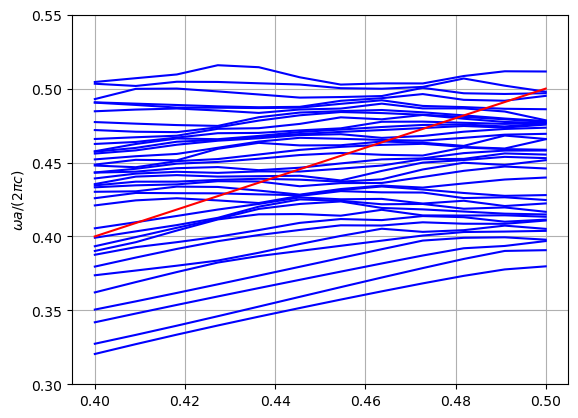

In [12]:
import matplotlib.pyplot as plt
numk,tmp=np.shape(te_freqs)
klist=np.linspace(0.4,0.5,numk)
fig,ax=plt.subplots()
x = range(len(te_freqs))
ratio=len(te_freqs)
for l in range(num_bands):
    plt.plot(klist,te_freqs[:,l],'b-')
plt.plot(klist,klist,'r-')
plt.ylim([0.3,0.55])
plt.grid()
plt.ylabel('$\omega a/(2\pi c)$')

如果使用高的Resolution,结果为
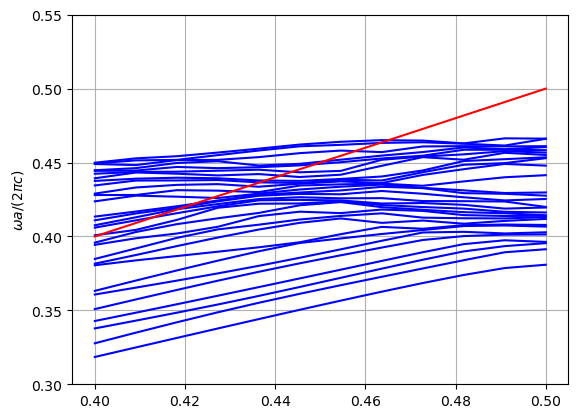

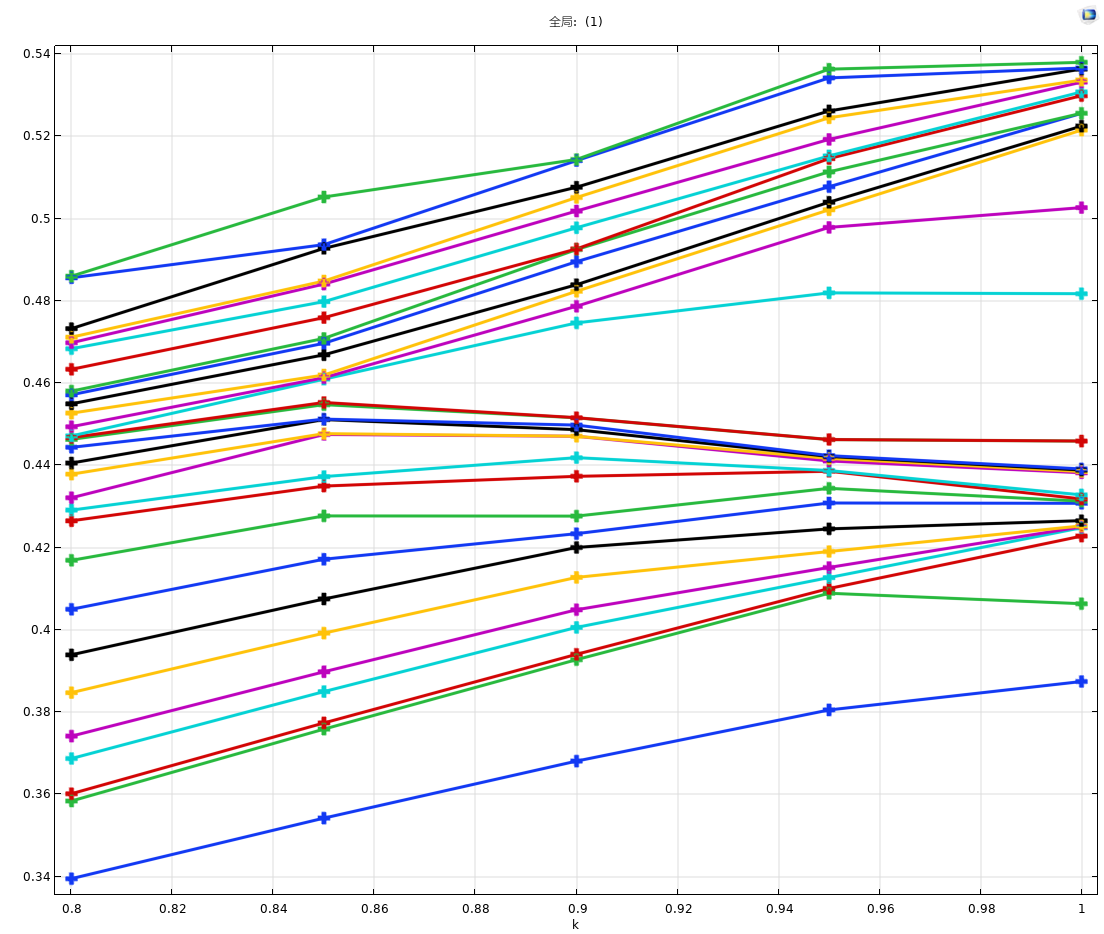